## Regression Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### define dataset

In [2]:
df = pd.read_csv("housePrice.csv")

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


### preprocessing

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [6]:
df["Area"] = pd.to_numeric(df["Area"], errors='coerce') # convert object type to float64 type on column Area

df["Area"].describe()

count    3450.000000
mean      106.917391
std        69.550976
min        30.000000
25%        69.000000
50%        90.000000
75%       120.000000
max       929.000000
Name: Area, dtype: float64

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


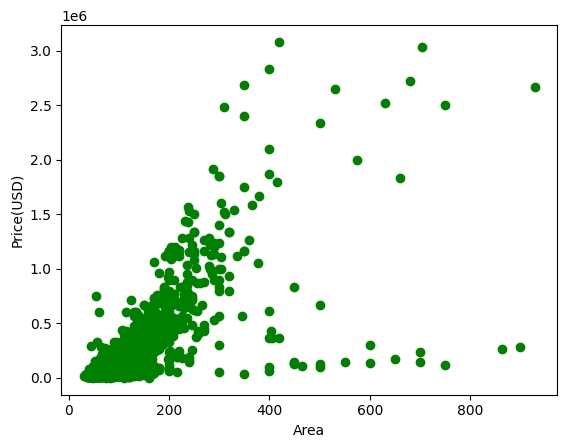

In [10]:
plt.plot(df["Area"], df["Price(USD)"], "go")
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

In [11]:
df = df[df["Area"] <= 600]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3438 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3438 non-null   float64
 1   Room        3438 non-null   int64  
 2   Parking     3438 non-null   bool   
 3   Warehouse   3438 non-null   bool   
 4   Elevator    3438 non-null   bool   
 5   Address     3438 non-null   object 
 6   Price       3438 non-null   float64
 7   Price(USD)  3438 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.2+ KB


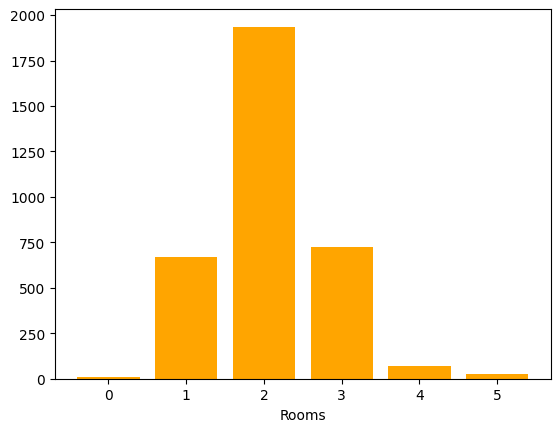

In [21]:
room_count = df["Room"].value_counts().sort_index()

plt.bar(room_count.index, room_count.values, color="orange")
plt.xlabel("Rooms")
plt.show()

In [25]:
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

df["Parking"].head(), df["Warehouse"].head(), df["Elevator"].head()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: Parking, dtype: int64,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: Warehouse, dtype: int64,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: Elevator, dtype: int64)

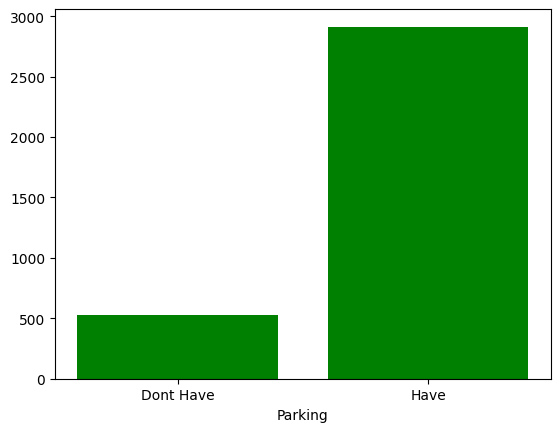

In [33]:
plt.bar(["Dont Have", "Have"], df["Parking"].value_counts().sort_index().values, color="green")
plt.xlabel("Parking")
plt.show()

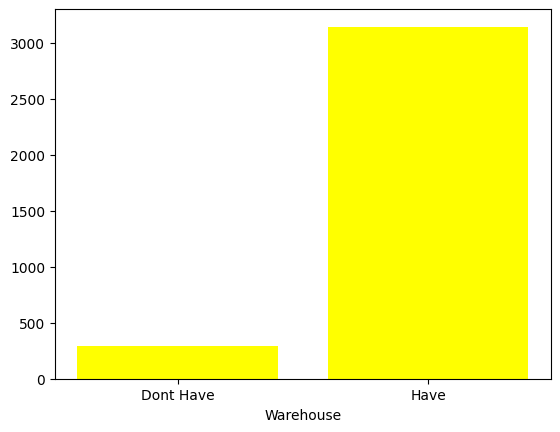

In [34]:
plt.bar(["Dont Have", "Have"], df["Warehouse"].value_counts().sort_index().values, color="yellow")
plt.xlabel("Warehouse")
plt.show()

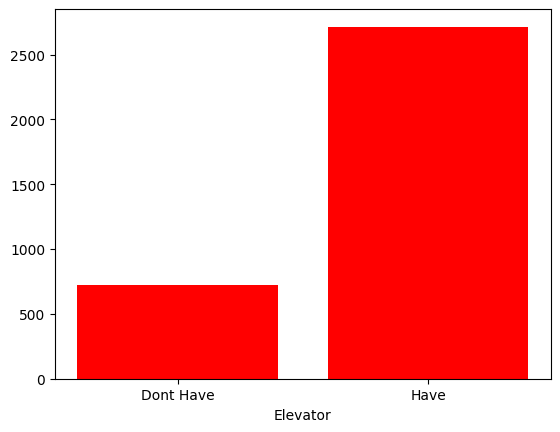

In [35]:
plt.bar(["Dont Have", "Have"], df["Elevator"].value_counts().sort_index().values, color="red")
plt.xlabel("Elevator")
plt.show()

In [36]:
le = LabelEncoder()
df["Address"] = le.fit_transform(df["Address"])

df["Address"].head()

0    156
1    156
2    117
3    152
4    150
Name: Address, dtype: int64

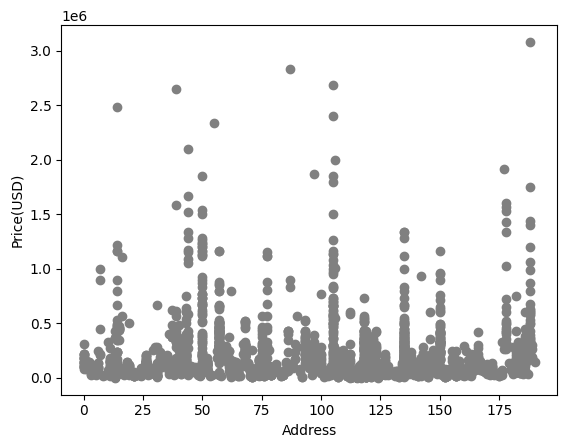

In [37]:
plt.scatter(df["Address"], df["Price(USD)"], color="gray")
plt.xlabel("Address")
plt.ylabel("Price(USD)")
plt.show()